In [15]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

Acknoledgement:
    Funding for the SDSS and SDSS-II has been provided by the Alfred P. Sloan Foundation, the Participating Institutions, the National Science Foundation, the U.S. Department of Energy, the National Aeronautics and Space Administration, the Japanese Monbukagakusho, the Max Planck Society, and the Higher Education Funding Council for England. The SDSS Web Site is http://www.sdss.org/.

The SDSS is managed by the Astrophysical Research Consortium for the Participating Institutions. The Participating Institutions are the American Museum of Natural History, Astrophysical Institute Potsdam, University of Basel, University of Cambridge, Case Western Reserve University, University of Chicago, Drexel University, Fermilab, the Institute for Advanced Study, the Japan Participation Group, Johns Hopkins University, the Joint Institute for Nuclear Astrophysics, the Kavli Institute for Particle Astrophysics and Cosmology, the Korean Scientist Group, the Chinese Academy of Sciences (LAMOST), Los Alamos National Laboratory, the Max-Planck-Institute for Astronomy (MPIA), the Max-Planck-Institute for Astrophysics (MPA), New Mexico State University, Ohio State University, University of Pittsburgh, University of Portsmouth, Princeton University, the United States Naval Observatory, and the University of Washington.

Depth with lowest median difference : 21


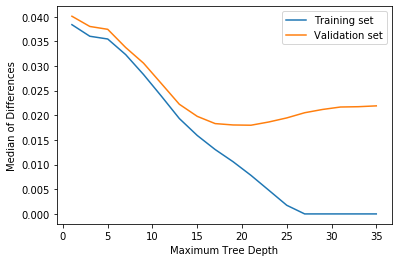

In [16]:
# paste your get_features_targets function here
def get_features_targets(data):
  # complete this function
  features = np.zeros((data.shape[0],4))
  features[:,0] = data['u']-data['g']
  features[:,1] = data['g']-data['r']
  features[:,2] = data['r']-data['i']
  features[:,3] = data['i']-data['z']
  targets = data['redshift']
  return features,targets


# paste your median_diff function here
def median_diff(predicted, actual):
  med_diff = np.median(abs(predicted-actual))
  return med_diff


# Complete the following function
def accuracy_by_treedepth(features, targets, depths):
  # split the data into testing and training sets
  split = features.shape[0]//2
  train_features = features[:split]
  test_features = features[split:]
  train_targets = targets[:split]
  test_targets = targets[split:]
    
  # initialise arrays or lists to store the accuracies for the below loop
  train_accuracy = []
  test_accuracy = []

  # loop through depths
  for depth in depths:
    # initialize model with the maximum depth. 
    dtr = DecisionTreeRegressor(max_depth=depth)
    # train the model using the training set
    m = dtr.fit(train_features,train_targets)
    # get the predictions for the training set and calculate their median_diff
    train_predictions = m.predict(train_features)
    train_med_diffs = median_diff(train_targets, train_predictions)
    train_accuracy.append(train_med_diffs)
    # get the predictions for the testing set and calculate their median_diff
    test_predictions = m.predict(test_features)
    test_med_diffs = median_diff(test_targets, test_predictions)
    test_accuracy.append(test_med_diffs)
    
  # return the accuracies for the training and testing sets
  return train_accuracy,test_accuracy



def main():
  data = np.load('sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # Generate several depths to test
  tree_depths = [i for i in range(1, 36, 2)]

  # Call the function
  train_med_diffs, test_med_diffs = accuracy_by_treedepth(features, targets, tree_depths)
  print("Depth with lowest median difference : {}".format(tree_depths[test_med_diffs.index(min(test_med_diffs))]))
    
  # Plot the results
  train_plot = plt.plot(tree_depths, train_med_diffs, label='Training set')
  test_plot = plt.plot(tree_depths, test_med_diffs, label='Validation set')
  plt.xlabel("Maximum Tree Depth")
  plt.ylabel("Median of Differences")
  plt.legend()
  plt.show()
main()
